In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('D:\\Github\\Exploratory-Data-Analysis-EDA-Projects\\Customer-Churn-Analysis\\data\\raw\\Telco Churn.csv')

---
# **Phase 1 - Data Overview and Understanding**

In [37]:
df.head(10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

### **Capitalize Column Names**

In [47]:
df.rename(columns={'customerID':'CustomerID','gender':'Gender','tenure':'Tenure'},inplace=True)

### **Detecting Duplicates**

In [ ]:
df['CustomerID'].duplicated().value_counts()
df.duplicated().value_counts()
df.duplicated().sum()

CustomerID
False    7043
Name: count, dtype: int64

### **Target Variable**

In [11]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### **Identifier Column**

In [48]:
df['CustomerID']

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: CustomerID, Length: 7043, dtype: object

### **Categorical Columns**

In [73]:
cat_cols=df[['Gender','Contract','PaymentMethod']]

### **Numerical Columns**

In [70]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df[['Tenure','MonthlyCharges','TotalCharges']].dtypes
num_cols=df[['Tenure','MonthlyCharges','TotalCharges']]

### **Detecting Missing Values**


In [52]:
df.isna().value_counts()
df.isna().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.loc[df['TotalCharges'].isna(),['Tenure','TotalCharges','Churn']].head(20)
df.loc[df['TotalCharges'].isna(),'Tenure'].value_counts()


Tenure
0    11
Name: count, dtype: int64

In [68]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [72]:
num_cols.apply(lambda x : x<0).sum()

Tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

### Phase 1 – Key Observations

* The Telco Customer Churn dataset contains 7,043 rows and 21 columns.
* The dataset includes an identifier column (`CustomerID`), which is not useful for analytical modeling.
* Numerical features include: `tenure`, `MonthlyCharges`, and `TotalCharges`.
* Categorical features include: `gender`, `Contract`, and `PaymentMethod`.
* No duplicate rows or duplicate customer IDs were found in the dataset.
* The `TotalCharges` column was initially stored as an object data type and was converted to a numeric type.
* The dataset contains no missing values, except for the `TotalCharges` column, which has 11 missing (NaN) values.
---

---
# **Phase 2 - Target Variable Analysis (Churn)**

### **Count Of Churn Customers**

In [86]:
df['Churn'].value_counts().reset_index()


,Churn,count
0,No,5174
1,Yes,1869


### **Percentage Of Churn Customers**


In [103]:
proportion_of_churn=df['Churn'].value_counts(normalize=True)*100
proportion_of_churn=proportion_of_churn.reset_index()
proportion_of_churn.columns=['Churn','Percentage']
proportion_of_churn

,Churn,Percentage
0,No,73.463013
1,Yes,26.536987


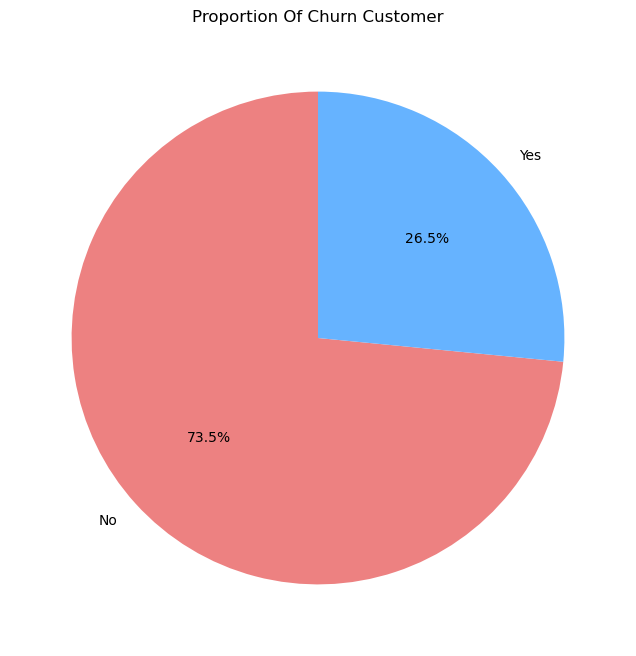

In [114]:
plt.figure(figsize=(8,8))
plt.pie(proportion_of_churn['Percentage'],labels=proportion_of_churn['Churn'],autopct='%1.1f%%',colors=["#ed8181",'#66b3ff'],startangle=90)
plt.title('Proportion Of Churn Customer')
plt.show()

### Phase 2 - Key Observations
* Out of **7,043 customers**, **1,869 customers** churned, while **5,174 customers** remained with the company.
* The overall **churn rate is approximately 26.5%**.
* A churn rate of nearly **one-quarter of the customer base** indicates a **significant business concern**, as acquiring new customers is more expensive than retaining existing ones and directly impacts company revenue.
 